# TITANIC SURVIVAL PREDICTION USING LOGISTIC CLASSIFICATION MODEL

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading our csv file
df = pd.read_csv('Titanic.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
# Extracting important features
df1 = df[['Passengerid','Age','Fare','Sex','sibsp','Pclass','Embarked','2urvived']]

In [4]:
df1

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,3,2.0,0
1,2,38.0,71.2833,1,1,1,0.0,1
2,3,26.0,7.9250,1,0,3,2.0,1
3,4,35.0,53.1000,1,1,1,2.0,1
4,5,35.0,8.0500,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,3,2.0,0


In [5]:
#Renaming column name 
df2 =df1.rename(columns ={'2urvived':'Survived'})
df2

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,3,2.0,0
1,2,38.0,71.2833,1,1,1,0.0,1
2,3,26.0,7.9250,1,0,3,2.0,1
3,4,35.0,53.1000,1,1,1,2.0,1
4,5,35.0,8.0500,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,3,2.0,0


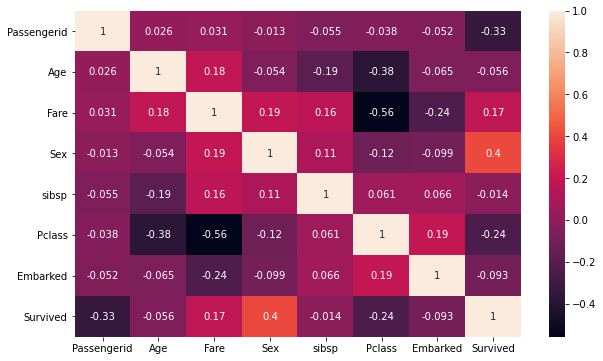

In [6]:
#Checking for corelation between the featiures
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(annot=True, data= df2.corr() )

## It is clearly visible from heatmap that 'Sex' is that feature which is highly corelated with our target variable in comparison with other features.

In [7]:
#checking NaN values
df2.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [8]:
# calculating the highest occurance digit in a column in order to replace it with NaN
df2['Embarked'].mode()

0    2.0
dtype: float64

In [9]:
# Replacing NaN with mode
df2['Embarked'].replace(np.NaN,2, inplace= True)


In [10]:
df2['Embarked'].isna().sum()

0

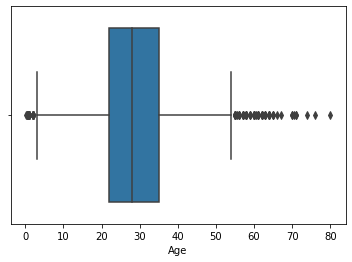

In [39]:
#Checking for outliers in Age column
sns.boxplot(df2['Age'])

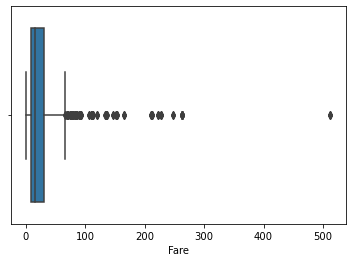

In [42]:
#Checking for outliers in Fare column
sns.boxplot(df2['Fare'])

In [55]:
df2['Fare'].max()

512.3292

In [60]:
# Removing a outlier or we can say that value which will degrade our model accuracy 
df2.drop(df2[df2['Fare'] > 300].index, inplace = True)
  

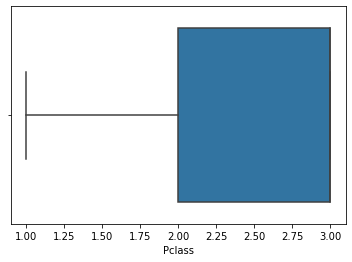

In [61]:
# Checking for outliers in Pclass column
sns.boxplot(df['Pclass'])

In [64]:
# Assigning the desired features in our dependent and independent variable
x=df2.drop('Survived', axis=1)
y=df2['Survived']

In [65]:
# Doing standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 1.30823599, -0.0353152 , -0.11471398, ...,  0.536743  ,
        -0.37271401,  0.61087978],
       [-0.3047635 , -0.11261019, -0.18548289, ..., -0.48329142,
         0.82520189, -1.85416814],
       [-0.50173043, -0.11261019, -0.46936502, ..., -0.48329142,
         0.82520189, -0.62164418],
       ...,
       [ 1.15119479,  0.81492969, -0.36734212, ..., -0.48329142,
        -0.37271401,  0.61087978],
       [ 1.60102468, -0.11261019, -0.46936502, ..., -0.48329142,
         0.82520189, -0.62164418],
       [-1.48922682, -0.49908515,  4.49089135, ...,  2.57681185,
        -1.5706299 ,  0.61087978]])

In [66]:
from sklearn.linear_model import LogisticRegression     
from sklearn.model_selection import train_test_split

In [67]:
# Splitting our dataset into trainning and testing dataset
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.30, random_state= 0)

In [68]:
# Creating a object 
obj = LogisticRegression()

In [69]:
# training ouur model
obj.fit(x_train,y_train)

c:\users\anmol\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# predicting the values on the test dataset
pred = obj.predict(x_test)

In [71]:
# Checking performance by using confusion matrix and classification report
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[267  19]
 [ 42  64]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       286
           1       0.77      0.60      0.68       106

    accuracy                           0.84       392
   macro avg       0.82      0.77      0.79       392
weighted avg       0.84      0.84      0.84       392



In [73]:
# Checking accuracy directly
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)*100

84.43877551020408

# Model accuracy is 84% which is quite good!! 